<a href="https://colab.research.google.com/github/anyaa07/predictfootball/blob/main/predictfootball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import io
import pandas as pd
from google.colab import files
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
import requests
uploaded = files.upload()




Saving QB20 - Sheet1.csv to QB20 - Sheet1.csv
Saving Records.csv to Records.csv
Saving QB22.csv to QB22.csv
Saving QBs.csv to QBs.csv


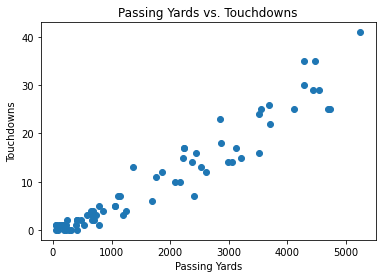

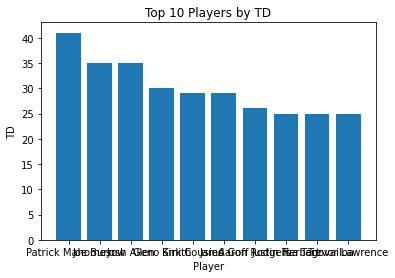

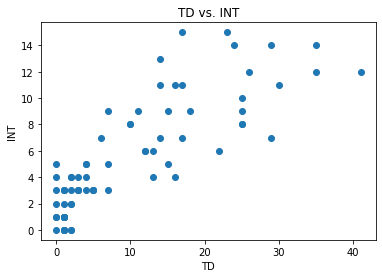

In [2]:
import matplotlib.pyplot as plt
data = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))

#scatter plot of passing yards and touchdowns
plt.scatter(data['Pass Yds'], data['TD'])
plt.xlabel('Passing Yards')
plt.ylabel('Touchdowns')
plt.title('Passing Yards vs. Touchdowns')
plt.show()

#Bar chart of player vs touchdowns
top_td = data.sort_values('TD', ascending=False).head(10)
plt.bar(top_td['Player'], top_td['TD'])
plt.xlabel('Player')
plt.ylabel('TD')
plt.title('Top 10 Players by TD')
plt.show()

#scatter plot of ints and touchdowns
plt.scatter(data['TD'], data['INT'])
plt.xlabel('TD')
plt.ylabel('INT')
plt.title('TD vs. INT')
plt.show()


In [35]:
#figure out how to incorporate team record
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
!pip install -q streamlit
# load data
QB20 = pd.read_csv(io.BytesIO(uploaded['QB20 - Sheet1.csv']))
QB21 = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
QB22 = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))
#Records = pd.read_csv(io.BytesIO(uploaded['Records.csv']))
pd.set_option('display.max_rows', None)

# merge data
QB21_2 = QB21.rename(columns={'Pass': 'Pass Yds', 'TD2': 'TD', 'INT2': 'INT', 'Att2': 'Att', 'Comp2': 'Comp', 'Year2': 'Year'})
QB20_2 = QB20.rename(columns={'TDs': 'TD', 'INTs': 'INT', 'Year3': 'Year'})
merged = pd.concat([QB20_2, QB21_2], axis=0, ignore_index=True)
merged2 = pd.concat([QB21_2, QB22], axis=0, ignore_index=True)
data = pd.merge(QB20, QB21, on=['Player', 'Team'])
data1 = pd.merge(data, QB22, on=['Player', 'Team'])

#data2 = pd.merge(data, Records, on='Team')


# create linear regression model
model = LinearRegression()
# loop through each player
for player in data1['Player'].unique():

    # fit model to player data, merge 20 and 21 for x, 21 and 22 for y
    X = merged[['Pass Yds', 'TD', 'INT', 'Comp', 'Att']]
    y = merged2[['Pass Yds', 'TD', 'INT', 'Comp', 'Att']]
    model.fit(X, y)

# predict 2023-24 season stats 
predicted_stats = model.predict(QB22[['Pass Yds', 'TD', 'INT', 'Comp', 'Att']])

    
# assign predicted statistics to the corresponding columns -- 
# mask --> selects only the rows of data that correspond to the current player that is being looped through
#enumerate --> gets the index of each of the selected rows where the players name matches the player variable, and assigns predicted stats only to the correct rows
pass_yd_pts = 0.04
pass_td_pts = 4
int_pts = -2
for index, player in enumerate(data1['Player'].unique()):
    mask = (data1['Player'] == player)
    data1.loc[mask, 'Pass Yds_2023_24'] = predicted_stats[index][0]
    data1.loc[mask, 'TD_2023_24'] = predicted_stats[index][1]
    data1.loc[mask, 'INT_2023_24'] = predicted_stats[index][2]
    data1.loc[mask, 'Comp_2023_24'] = predicted_stats[index][3]
    data1.loc[mask, 'Att_2023_24'] = predicted_stats[index][4]
    fantasy_points = data1['Pass Yds_2023_24']*pass_yd_pts + data1['TD_2023_24']*pass_td_pts + data1['INT_2023_24']*int_pts
    data1.loc[mask, 'Fantasy_Points'] = predicted_stats[index][4]
#QBR Calculation
cp = (data1['Comp_2023_24'] / data1['Att_2023_24'] - 0.3) * 0.05
ypa = (data1['Pass Yds_2023_24'] / data1['Att_2023_24'] - 3) * 0.25
tdp = (data1['TD_2023_24'] / data1['Att_2023_24']) * 0.2
intp = (data1['INT_2023_24'] / data1['Att_2023_24']) * 0.25

data1['QBR'] = ((data1['Comp_2023_24'] - 30) / 20 + ((data1['Pass Yds_2023_24'] / data1['Att_2023_24']) - 3) * 0.25 + (data1['TD_2023_24']) * 0.2 + 2.375 - (data1['INT_2023_24'] * 0.25)) * 100 / 6 / 3

# print the modified data frame
print(data1)
#mean_absolute_error(y, predicted_stats)
#mean_squared_error(y, predicted_stats)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.2 MB/s eta 0:00:00
          Team             Player  Pass Yds_x  TDs  INTs  Att_x  Comp_x  \
0       Chiefs    Patrick Mahomes        4031   26     5    484     319   
1     Chargers     Justin Herbert           0    0     0      0       0   
2   Buccaneers          Tom Brady        4057   24     8    613     399   
3      Vikings       Kirk Cousins        3603   26     6    444     307   
4      Bengals         Joe Burrow           0    0     0      0       0   
5        Lions         Jared 

In [ ]:
from sklearn.model_selection import train_test_split

# load data
QB21 = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
QB22 = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))
Records = pd.read_csv(io.BytesIO(uploaded['Records.csv']))
pd.set_option('display.max_rows', None)

# merge data
QB21 = QB21.rename(columns={'Pass': 'Pass Yds', 'TD2': 'TD', 'INT2': 'INT', 'Att2': 'Att', 'Comp2': 'Comp'})
data = pd.merge(QB22, QB21, on=['Player', 'Team'])

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(QB21[['Pass Yds', 'TD', 'INT', 'Comp', 'Att']], QB22[['Pass Yds', 'TD', 'INT', 'Comp', 'Att']], test_size=0.2)

# create linear regression model
model = LinearRegression()

# fit model to training data
model.fit(X_train, y_train)\

# loop through each player and predict stats for test data
for i, row in data.iterrows():
    # predict 2023-24 season stats
    predicted_stats = model.predict([row])

    # assign predicted statistics to the corresponding columns
    data.loc[i, 'Pass Yds_2023_24'] = predicted_stats[0][0]
    data.loc[i, 'TD_2023_24'] = predicted_stats[0][1]
    data.loc[i, 'INT_2023_24'] = predicted_stats[0][2]
    data.loc[i, 'Att_2023_24'] = predicted_stats[0][3]
    data.loc[i, 'Comp_2023_24'] = predicted_stats[0][4]

# QBR Calculation
data['QBR'] = (50 * (data['Pass Yds_2023_24'] / data['Att_2023_24'] - 3) +
               20 * (data['TD_2023_24'] / data['Att_2023_24']) +
               2.375 * data['Att_2023_24'] / data['Comp_2023_24'] +
               100 * ((data['TD_2023_24'] / data['Att_2023_24']) - (data['INT_2023_24'] / data['Att_2023_24']))) / 6

# FP Calculation
# Points for each thing
pass_yd_pts = 0.04
pass_td_pts = 4
int_pts = -2

# calculate fantasy points for each player
data['Fantasy Points'] = data['Pass Yds_2023_24']*pass_yd_pts + data['TD_2023_24']*pass_td_pts + data['INT_2023_24']*int_pts

# print the modified data frame
print(data)

SyntaxError: ignored

In [ ]:
#*******

import pandas as pd
from sklearn.linear_model import LinearRegression

# load data
QB22 = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
QBs = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))

# merge data
data = pd.merge(QBs, QB22, on='Player', suffixes=('_2022_23', '_2021_22'))
data['Proj Pass Yds'] = 0
data['Proj Tds'] = 0
data['Proj Ints'] = 0
# create linear regression model
# create linear regression model
model_2021_22 = LinearRegression()
model_2022_23 = LinearRegression()

# create empty lists to store projected statistics
projected_pass_yds = []
projected_tds = []
projected_ints = []

# loop through each player
for player in data['Player'].unique():

    # filter data for player
    player_data = data[data['Player'] == player]

    # fit 2021-22 model to player data
    X_2021_22 = player_data[['Pass', 'TD2', 'INT2']]
    y_2021_22 = player_data[['Proj Pass Yds', 'Proj Tds', 'Proj Ints']]
    model_2021_22.fit(X_2021_22, y_2021_22)
    
    # fit 2022-23 model to player data
    X_2022_23 = player_data[['Pass Yds', 'TD', 'INT', 'Pass', 'TD2', 'INT2']]
    y_2022_23 = player_data[['Proj Pass Yds', 'Proj Tds', 'Proj Ints']]
    model_2022_23.fit(X_2022_23, y_2022_23)
    
    # predict 2023-24 season stats
    predicted_stats = model_2022_23.predict([[player_data['Pass Yds'].values[0], player_data['TD'].values[0], player_data['INT'].values[0]]])
    predicted_stats = model_2021_22.predict([[player_data['Pass'].values[0], player_data['TD2'].values[0], player_data['INT2'].values[0]]])

    # add projected statistics to the empty lists
    projected_pass_yds.append(predicted_stats[0][0])
    projected_tds.append(predicted_stats[0][1])
    projected_ints.append(predicted_stats[0][2])

# add projected statistics as new columns to the original data frame
data['Projected Pass Yds'] = projected_pass_yds
data['Projected TDs'] = projected_tds
data['Projected INTs'] = projected_ints

# print the modified data frame
print(data)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
print(df)

             Player  Pass  TD2  INT2    Year2
0   Patrick Mahomes  4806   37    13  2021-22
1    Justin Herbert  4336   31    14  2021-22
2         Tom Brady  5316   43    12  2021-22
3      Kirk Cousins  4245   33     7  2021-22
4        Joe Burrow  4611   34    14  2021-22
..              ...   ...  ...   ...      ...
69     Jeff Driskel     0    0     0  2021-22
70  Chris Streveler     0    0     0  2021-22
71      Jacob Eason   132    0     1  2021-22
72     Tyrod Taylor  1841   10     4  2021-22
73     Chase Daniel    84    0     0  2021-22

[74 rows x 5 columns]


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read in QB data from both tables
df1 = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
df = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))
pd.set_option('display.max_rows', None)
print(df1)
print(df)
print(df1.dtypes)
print(df.dtypes)

# Concatenate QB data from both tables
data = pd.concat([df, df1], ignore_index=True)

# Select relevant columns for modeling
data = data[['Player', 'Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']]
data[['Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']] = data[['Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']].astype(float)
# Create linear regression model for each player
models = {}
models = {}
for player in data['Player'].unique():
    train_data = data[data['Player'] != player]
    test_data = data[data['Player'] == player].copy() # make a copy of test_data
    
    model = LinearRegression()
    model.fit(train_data[['Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']], train_data[['Pass Yds', 'TD', 'INT']])
    
    models[player] = model
    
    test_data[['Projected Yds', 'Projected TD', 'Projected INT']] = model.predict(test_data[['Pass Yds', 'TD', 'INT']])
    
    print(f"Projected stats for {player}:")
    print(test_data[['Player', 'Projected Yds', 'Projected TD', 'Projected INT']])


               Player  Pass  TD2  INT2    Year2
0     Patrick Mahomes  4806   37    13  2021-22
1      Justin Herbert  4336   31    14  2021-22
2           Tom Brady  5316   43    12  2021-22
3        Kirk Cousins  4245   33     7  2021-22
4          Joe Burrow  4611   34    14  2021-22
5          Jared Goff  3952   20    13  2021-22
6          Josh Allen  4407   36    15  2021-22
7          Geno Smith   920    5     3  2021-22
8     Trevor Lawrence  2769   14    10  2021-22
9         Jalen Hurts  2169   16     9  2021-22
10      Aaron Rodgers  4299   37     4  2021-22
11     Tua Tagovailoa  2798   18     9  2021-22
12     Russell Wilson  3123   22     6  2021-22
13         Derek Carr  4804   23    14  2021-22
14       Daniel Jones  2729   11    10  2021-22
15        Davis Mills  2205    9     5  2021-22
16          Matt Ryan  4249   21    12  2021-22
17          Mac Jones  2854   16     9  2021-22
18        Andy Dalton  1983    9     7  2021-22
19       Dak Prescott  1841   10     1  

ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Read in QB data from both tables
QB22 = pd.read_csv("QB22.csv")
QBs = pd.read_csv("QBs.csv")
print(QB22)

# Concatenate QB data from both tables
data = pd.concat([QBs, QB22], ignore_index=True)

# Select relevant columns for modeling
data = data[['Player', 'Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']]

# Create linear regression model for each player
models = {}
for player in data['Player'].unique():
    train_data = data[data['Player'] != player]
    test_data = data[data['Player'] == player]
    
    model = LinearRegression()
    model.fit(train_data[['Pass Yds', 'Pass', 'TD', 'TD2', 'INT', 'INT2']], train_data['Player'])
    
    models[player] = model
    
    preds = model.predict(test_data[['PassYds', 'PassTD', 'Int']])
    print(f"Projected stats for {player}:")
    print(f"Projected yards: {preds[0][0]:.0f}")
    print(f"Projected touchdowns: {preds[0][1]:.0f}")
    print(f"Projected interceptions: {preds[0][2]:.0f}")

KeyError: ignored

In [ ]:
# Load QBs.csv and QBs2.csv
df1 = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))
df = pd.read_csv(io.BytesIO(uploaded['QB22.csv']))
print(df)
print(df1)
pd.set_option('display.max_rows', None)

# Create new columns with default values
df['Proj Pass Yds'] = 0
df['Proj Tds'] = 0
df['Proj Ints'] = 0
df['Proj QBR'] = 0.0
df['Proj Fantasy Points'] = 0

# Replace commas with nothing in 'Pass' column
df['Pass'] = df['Pass'].str.replace(',', '')

# Convert 'Pass', 'TD2', and 'INT2' columns to integers
df[['Pass', 'TD2', 'INT2']] = df[['Pass', 'TD2', 'INT2']].astype(int)

# Loop through each player
for index, row in df.iterrows():
    # Calculate new projected stats
    df1.at[index, 'Proj Pass Yds'] = int(row['Pass Yds'])
    df1.at[index, 'Proj Tds'] = int(row['TD'])
    df1.at[index, 'Proj Ints'] = int(row['INT'])
    df.at[index, 'Proj Pass Yds'] = int(row['Pass'])
    df.at[index, 'Proj Tds'] = int(row['TD2'])
    df.at[index, 'Proj Ints'] = int(row['INT2'])

print(df)

NameError: ignored

In [ ]:
# Projected seasonal stats for QB 
# Load the player stats into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['QBs.csv']))
df = pd.read_csv(io.BytesIO(uploaded['QBs2.csv']))
pd.set_option('display.max_rows', None)

# Create new columns with default values
df['Proj Pass Yds'] = 0
df['Proj Tds'] = 0
df['Proj Ints'] = 0
df['Proj QBR'] = 0.0
df['Proj Fantasy Points'] = 0

# Loop through each player
for index, row in df.iterrows():
    # Calculate new projected stats
    df.at[index, 'Proj Pass Yds'] = int(row['Pass Yds'])
    df.at[index, 'Proj Tds'] = int(row['TD'])
    df.at[index, 'Proj Ints'] = int(row['INT'])

    # Calculate projected fantasy points, add fantasy points formula
    proj_fantasy_points = df.at[index, 'Proj Pass Yds'] * pass_yds_weight + df.at[index, 'Proj Tds'] * tds_weight + df.at[index, 'Proj Ints'] * ints_weight
    df.at[index, 'Proj Fantasy Points'] = proj_fantasy_points

# Prepare the data for the regression analysis
X = df[['Pass Yds', 'TD', 'INT']]
y = df['QBR']

# Train the regression model
reg = LinearRegression().fit(X, y)

# Loop through each player again
for index, row in df.iterrows():
    # Predict the QBR
    proj_stats = [df.at[index, 'Proj Pass Yds'], df.at[index, 'Proj Tds'], df.at[index, 'Proj Ints']]
    df.at[index, 'Proj QBR'] = round(reg.predict([proj_stats])[0], 1) #add qbr formula 

# Print the updated DataFrame
print(df)

KeyError: ignored

In [ ]:
#weather
def get_weather(team):
    stadiums = {
        "Arizona Cardinals": "State Farm Stadium, Glendale, AZ",
        "Atlanta Falcons": "Mercedes-Benz Stadium, Atlanta, GA",
        "Baltimore Ravens": "Baltimore, MD",
        "Buffalo Bills": "Highmark Stadium, Orchard Park, NY",
        "Carolina Panthers": "Bank of America Stadium, Charlotte, NC",
        "Chicago Bears": "Soldier Field, Chicago, IL",
        "Cincinnati Bengals": "Paul Brown Stadium, Cincinnati, OH",
        "Cleveland Browns": "FirstEnergy Stadium, Cleveland, OH",
        "Dallas Cowboys": "AT&T Stadium, Arlington, TX",
        "Denver Broncos": "Empower Field at Mile High, Denver, CO",
        "Detroit Lions": "Ford Field, Detroit, MI",
        "Green Bay Packers": "Lambeau Field, Green Bay, WI",
        "Houston Texans": "NRG Stadium, Houston, TX",
        "Indianapolis Colts": "Lucas Oil Stadium, Indianapolis, IN",
        "Jacksonville Jaguars": "TIAA Bank Field, Jacksonville, FL",
        "Kansas City Chiefs": "Arrowhead Stadium, Kansas City, MO",
        "Las Vegas Raiders": "Allegiant Stadium, Las Vegas, NV",
        "Los Angeles Chargers": "SoFi Stadium, Inglewood, CA",
        "Los Angeles Rams": "SoFi Stadium, Inglewood, CA",
        "Miami Dolphins": "Hard Rock Stadium, Miami Gardens, FL",
        "Minnesota Vikings": "U.S. Bank Stadium, Minneapolis, MN",
        "New England Patriots": "Gillette Stadium, Foxborough, MA",
        "New Orleans Saints": "Caesars Superdome, New Orleans, LA",
        "New York Giants": "MetLife Stadium, East Rutherford, NJ",
        "New York Jets": "MetLife Stadium, East Rutherford, NJ",
        "Philadelphia Eagles": "Lincoln Financial Field, Philadelphia, PA",
        "Pittsburgh Steelers": "Heinz Field, Pittsburgh, PA",
        "San Francisco 49ers": "Levi's Stadium, Santa Clara, CA",
        "Seattle Seahawks": "Lumen Field, Seattle, WA",
        "Tampa Bay Buccaneers": "Raymond James Stadium, Tampa, FL",
        "Tennessee Titans": "Nissan Stadium, Nashville, TN",
        "Washington Football Team": "FedExField, Landover, MD",
    }

    stadium = stadiums.get(team)

    if stadium is None:
        return "Invalid team"

    api_key = "dbf1e6b0fa8f45b688a31211231402"
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={stadium}&aqi=no"
    response = requests.get(url)

    if response.status_code == 200:
        weather_data = response.json()
        temperature_c = weather_data["current"]["temp_c"]
        temperature_f = weather_data["current"]["temp_f"]
        description = weather_data["current"]["condition"]["text"]
        return f"The current temperature in {stadium} is {temperature_c}°C ({temperature_f}°F) and the weather is {description}."
    else:
        return "Failed to retrieve weather data."

team_dropdown = widgets.Dropdown(
    options=["Arizona Cardinals", "Atlanta Falcons", "Baltimore Ravens", "Seattle Seahawks"],
    value=None,
    description="Team:",
    disabled=False,
)

display(team_dropdown)

output = widgets.Output()
display(output)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        team = change['new']
        with output:
            output.clear_output()
            print(get_weather(team))

team_dropdown.observe(on_change)

Dropdown(description='Team:', options=('Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens', 'Seattle Se…

Output()

In [ ]:
#fix --> Qbr not showing up as decimal, fantasy points & QBR being innacurate, make it so if ran more than once the values do not change
#add --> wr & rb & te stats

In [ ]:
10+.75
10.2+.75
10/3
10//3

3

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['QB.csv']))
pd.set_option('display.max_rows', None)
print(df)
if df.loc[df['Att'] == 648].any().any():
    print("hi")

                 Player  Pass Yds  Yds/Att  Att  Cmp  Cmp %  TD  INT    QBR  \
0       Patrick Mahomes      5250      8.1  648  435   67.1  41   12  105.2   
1        Justin Herbert      4739      6.8  699  477   68.2  25   10   93.2   
2             Tom Brady      4694      6.4  733  490   66.8  25    9   90.7   
3          Kirk Cousins      4547      7.1  643  424   65.9  29   14   92.5   
4            Joe Burrow      4475      7.4  606  414   68.3  35   12  100.8   
5            Jared Goff      4438      7.6  587  382   65.1  29    7   99.3   
6            Josh Allen      4283      7.6  567  359   63.3  35   14   96.6   
7            Geno Smith      4282      7.5  572  399   69.8  30   11  100.9   
8       Trevor Lawrence      4113      7.0  584  387   66.3  25    8   95.2   
9           Jalen Hurts      3701      8.0  460  306   66.5  22    6  101.6   
10        Aaron Rodgers      3695      6.8  542  350   64.6  26   12   91.1   
11       Tua Tagovailoa      3548      8.9  400  259

# New Section